# Cross-Validation and Scikit-Learn Model Template

Cross-validation is a technique that uses the training data, for which we have outcome labels, to estimate the performance and bias of a classifier.  It is commonly called *k*-fold cross-validation (*k*-fold CV), since we partition the training data into *k* groups.  We then leave one of those groups out for testing data, train the model on the remaining groups, and test on the left out group to get an estimate of performance.  The performance is then averaged across all **folds** (groups).  Here is a summary:

 - Randomly split the data into *k* folds
 - For *i* in 1...*k*, leave out fold *i* for testing
 - Train the classifier on all folds except for fold *i* (the left out fold)
 - Assess performance by testing on the left out fold *i*
 - Repeat and average performance across all folds

Scikit-learn has built-in functions for creating CV folds and computing CV metrics.  An example is given below with the Perceptron neural network classifier.  Use this format on your own classifier to develop results for Week 3.

In [3]:
import pandas as pd
import numpy as np

In [46]:
# Load the data
train_full = pd.read_csv('proj4_RandomForests.csv')

full_dataset = train_full

# Drop the row indices
train_full = train_full.drop(train_full.columns[0:13], axis=1)
train_full = train_full.drop(train_full.columns[1:3], axis=1)
train_full = train_full.drop(train_full.columns[2:4], axis=1)
train_full = train_full.drop(train_full.columns[3], axis=1)
train_full = train_full.drop(train_full.columns[0:2], axis=1)

# Log transform the Fare feature to be more normally distributed
#train_full['Fare'] = np.log10(train_full['Fare'] + 1)

train_full.head()

,Feedlot,AMR_class_Richness,AMR_class_Shannon,AMR_mech_Richness,AMR_mech_Shannon,Bacteroidetes,Tenericutes,Firmicutes,Chloroflexi,Actinobacteria,...,EF-Tu inhibition,MDR mutant porin proteins,Lincomycin-resistant lmrA,Rifampin-resistant beta-subunit of RNA polymerase RpoB,Polymyxin-resistant phoP,Quinolone resistance protein Qnr,VanD-type accessory protein,VanG-type accessory protein,VanE-type resistance protein,Tetracycline inactivation enzymes
0,42,15,1.633571,40,2.217266,790.308965,217.626203,3228.431538,0.000000,272.243795,...,29210.585850,23.498026,0.0,22719.987195,6.402732,0.0,0.0,0.000000,0.0,21075.488208
1,42,15,1.633571,40,2.217266,790.308965,217.626203,3228.431538,0.000000,272.243795,...,5712.224475,16.371897,0.0,4267.676768,4.984792,0.0,0.0,0.000000,0.0,1940.905336
2,21,13,0.753686,32,1.191620,1152.615063,136.087866,1797.384937,2.405858,1672.489540,...,3153.750000,0.959821,0.0,1735.736607,0.334821,0.0,0.0,0.000000,0.0,3036.897321
3,21,15,1.243878,46,1.772947,674.943834,124.748729,2100.390209,2.483150,150.762682,...,6091.602916,66.066553,0.0,17592.706728,17.498806,0.0,0.0,0.387461,0.0,5923.138612
4,21,14,1.772118,37,2.238513,1053.934974,187.632938,1961.561835,3.342449,745.214221,...,4001.217381,0.608691,0.0,3035.932376,0.000000,0.0,0.0,0.000000,0.0,12177.266390


In [14]:
full_dataset.head()

,ID,short_ID,Seq_time,Paired_raw_reads,Paired_trimmed_reads,Paired_nonhost_reads,Pair_ID,Paired_ID,Sample_Label,Group,...,EF-Tu inhibition,MDR mutant porin proteins,Lincomycin-resistant lmrA,Rifampin-resistant beta-subunit of RNA polymerase RpoB,Polymyxin-resistant phoP,Quinolone resistance protein Qnr,VanD-type accessory protein,VanG-type accessory protein,VanE-type resistance protein,Tetracycline inactivation enzymes
0,PA1,PA1_concatenated,first,19035233,18558843,15216603,14,A14,420117,Arrival,...,29210.585850,23.498026,0.0,22719.987195,6.402732,0.0,0.0,0.000000,0.0,21075.488208
1,PA1,PA1_concatenated,first,19035233,18558843,15216603,14,A14,420117,Arrival,...,5712.224475,16.371897,0.0,4267.676768,4.984792,0.0,0.0,0.000000,0.0,1940.905336
2,PA10,PA10_concatenated,first,16122418,15697233,13754443,15,A15,210359,Arrival,...,3153.750000,0.959821,0.0,1735.736607,0.334821,0.0,0.0,0.000000,0.0,3036.897321
3,PA12,PA12_concatenated,first,22526789,21931645,19279738,16,A16,210360,Arrival,...,6091.602916,66.066553,0.0,17592.706728,17.498806,0.0,0.0,0.387461,0.0,5923.138612
4,PA13,PA13_concatenated,first,20106815,19589521,16684745,17,A17,210361,Arrival,...,4001.217381,0.608691,0.0,3035.932376,0.000000,0.0,0.0,0.000000,0.0,12177.266390


In [49]:
# Ignore warnings from sklearn (omit this if you're still experimenting with code)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Import the things we need for this code block
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create the CV folds
# First separate the target data from the features
X = train_full.drop('rn', axis=1)
y = full_dataset['Group']

# Fit and sore the cross-validation using 10-fold CV
classifier = RandomForestClassifier(criterion='gini', n_jobs=4, random_state=154,n_estimators=1000)
scores = cross_val_score(classifier, X, y, cv=10)

print('The mean and std deviation of the CV scores is {:.3f} (+/- {:.3f})'.format(np.mean(scores), np.std(scores)))

The mean and std deviation of the CV scores is 0.626 (+/- 0.129)


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=1000)
regr.fit(X, y)
print(regr.feature_importances_)
print(regr.predict([[0, 0, 0, 0]]))



[0.18146984 0.81473937 0.00145312 0.00233767]
[-8.32987858]


The score of this Random Forest Classifier is 0.450


Text(0.5,1,'Feature Importances: Gini Criterion')

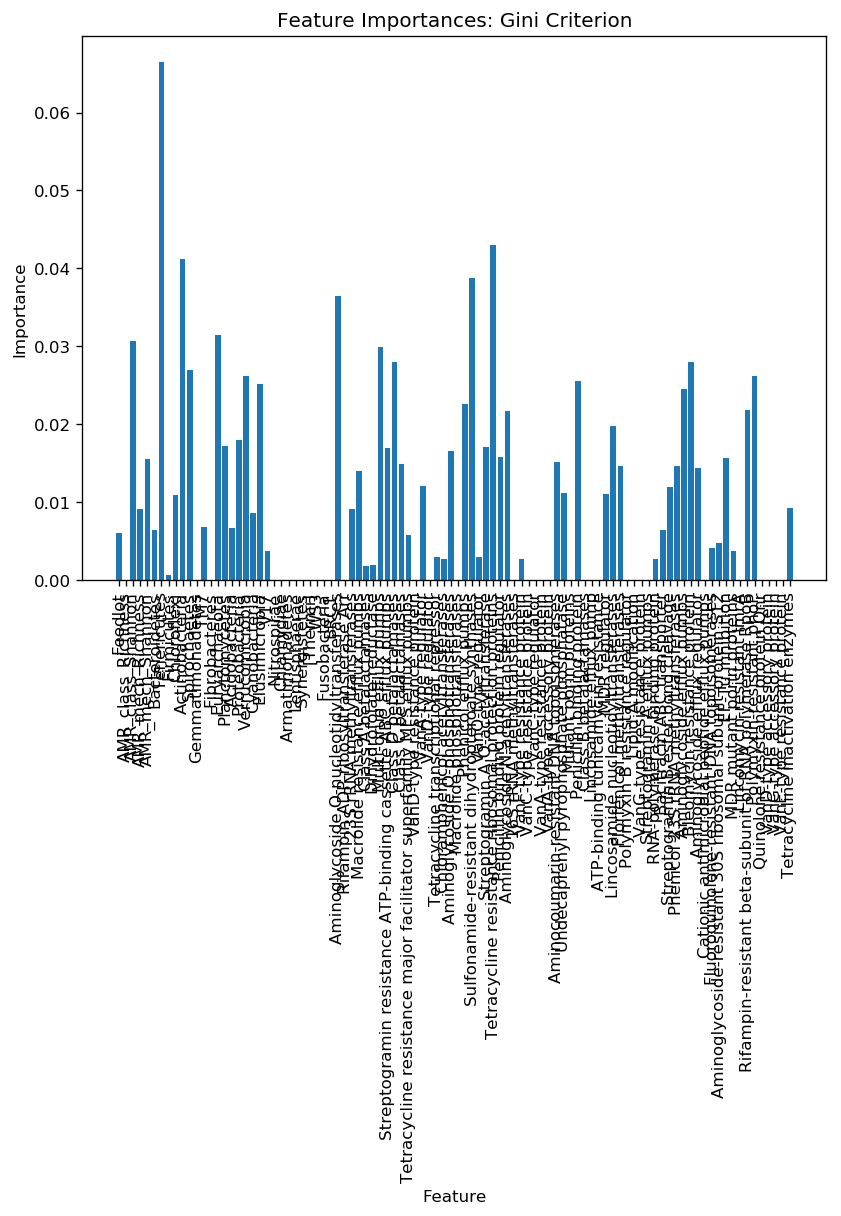

In [50]:
# Examine the coefficients for each feature with a single fold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=120)

# Split the data into training and testing sets (20% of the data for testing)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=154)

# Train and score the classifier
classifier2 = RandomForestClassifier(criterion='gini', n_jobs=4, random_state=154)
classifier2.fit(Xtrain, ytrain)
scores2 = classifier2.score(Xtest, ytest)

print('The score of this Random Forest Classifier is {:.3f}'.format(scores2))

# Feature importance
importances = list(classifier2.feature_importances_)
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, Xtrain.columns, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances: Gini Criterion')

In [18]:
# Plot example of the first tree
from sklearn.tree import export_graphviz
import os

export_graphviz(classifier2.estimators_[0],
               feature_names=Xtrain.columns,
               filled=True,
               rounded=True,
               out_file='RandomForestTree0.dot')
os.system('dot -Tpng RandomForestTree0.dot -o RandomForestTree0.png')

0

In [19]:
# Plot example of another tree
from sklearn.tree import export_graphviz
import os

export_graphviz(classifier2.estimators_[1],
               feature_names=Xtrain.columns,
               filled=True,
               rounded=True,
               out_file='RandomForestTree1.dot')
os.system('dot -Tpng RandomForestTree1.dot -o RandomForestTree1.png')

0